# Python Basics: Data Visualization - Exercises


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


Our exercise project will be to create a meaningful plot of a time series. For that
load the `GDAX.csv` with the appropriate functions and transform the date column into
a date time object.

In [2]:
GDAX = pd.___('GDAX.csv')

In [3]:
GDAX['Date'] = pd.___(GDAX['Date'])
GDAX.___('Date', inplace=True)

Select the "Adjusted Close" column and store in a new dataframe

In [4]:
GDAX_adj = ___

We add another column for returns. The reason why we want to focus on returns
will be explained in the next lesson. For now, we are simply interested in the shape.
Drop the NAs at the end.

In [5]:
returns = 
fin_df = 



Plot the dataframe in one figure but with two axes. Make sure that both plots share the same
y.axis

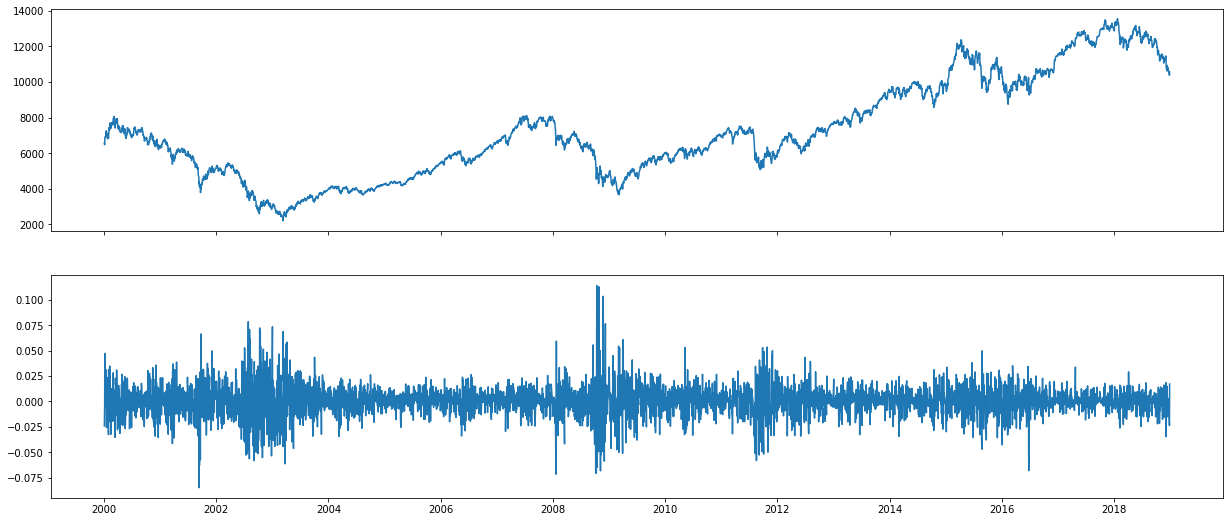

Next, plot the histogram of the returns with 100 bins and label the axis adequately.

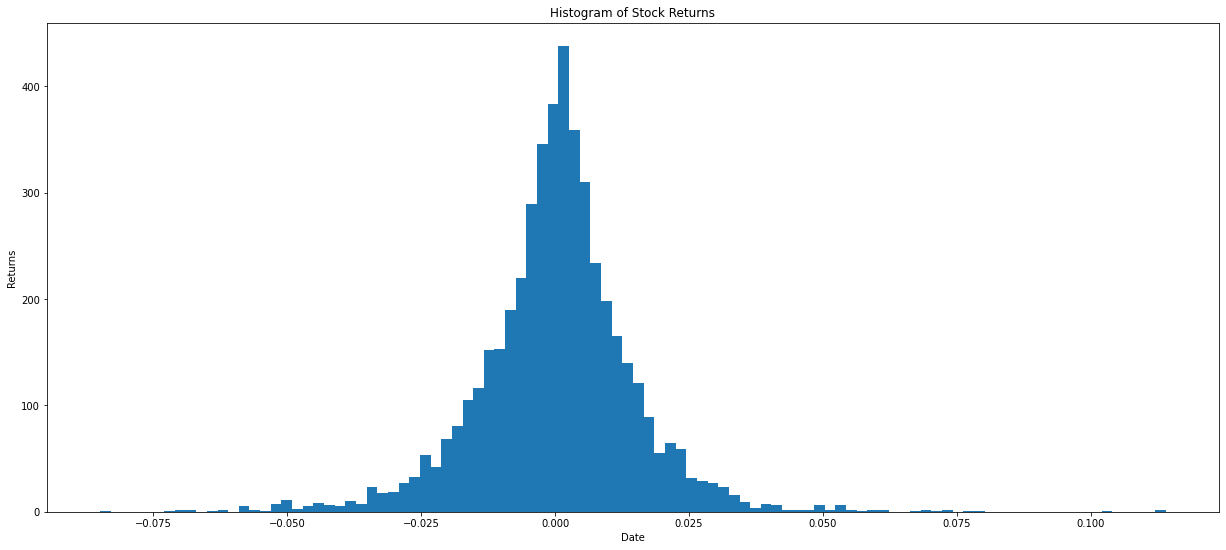

Draw a red line with the 5% quantile and a green line at the 95% quantile. Use `np.quantile` in order to determine
the quantile first.

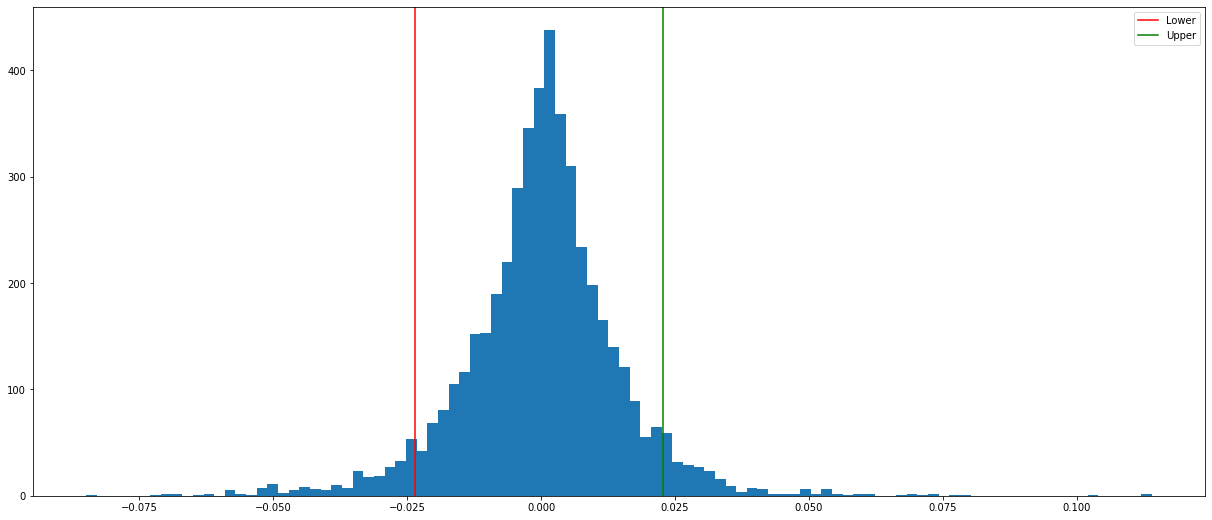

In [9]:
upper_quantile = np.___
lower_quantile = np.___



We will now focus on the data between 2007-2009.

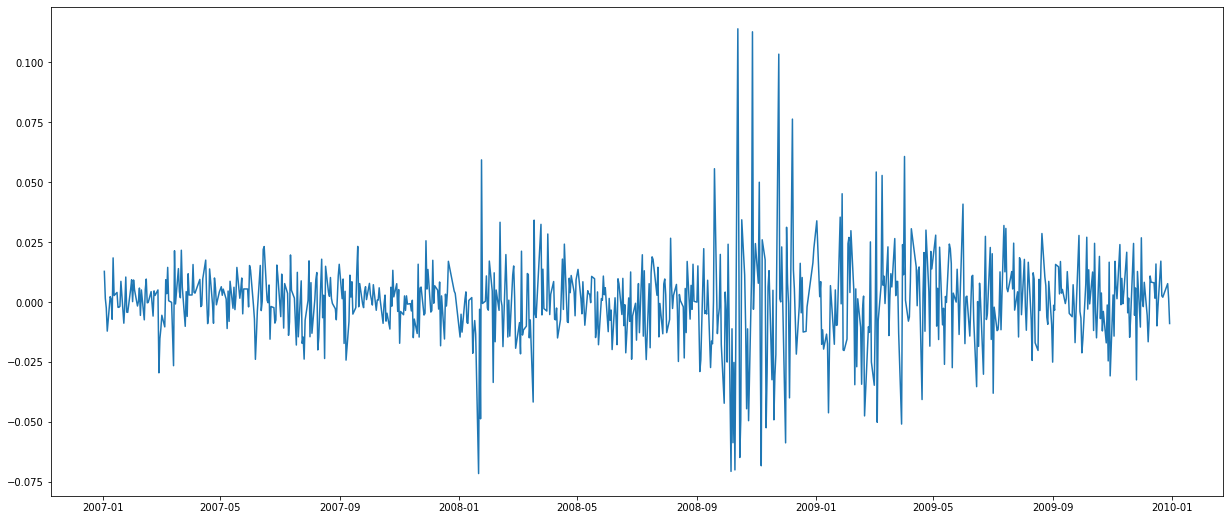

In [10]:
fin_df_sub = fin_df['2007':'2009']['returns']

plt.plot(fin_df_sub)
plt.gcf().set_size_inches(21, 9)

Regarding the plot above, set a red marker for all monthly minima and a green marker for
all monthly maxima.

Find the monthly minima and maxima first and store them in an array.
Then stack the plots into one plot. Explore the `.groupby` function of a
dataframe and the `pd.Grouper(freq = ...)` function. Hint: You also need the `.idxmax`
method to attain the right time stamp of the maxima/minima.

In [11]:
# Returns the index of the maximal & minimal value

M_max_idx = fin_df_sub.groupby(pd.Grouper(freq='M')).idxmax()   # Example

M_min_idx = 

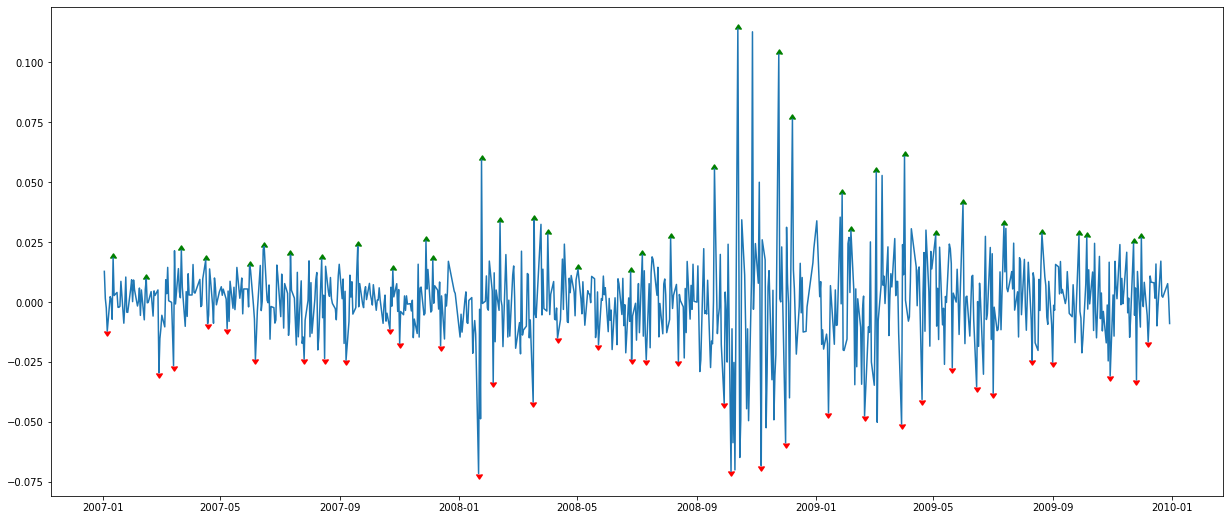

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(21, 9)
ax.plot(___)
ax.scatter(___)
ax.scatter(___)
plt.show()

Bonus: Add the amount of return as text above/below the corresponding markers. Use `ax.annotate`
and an appropriated loop.

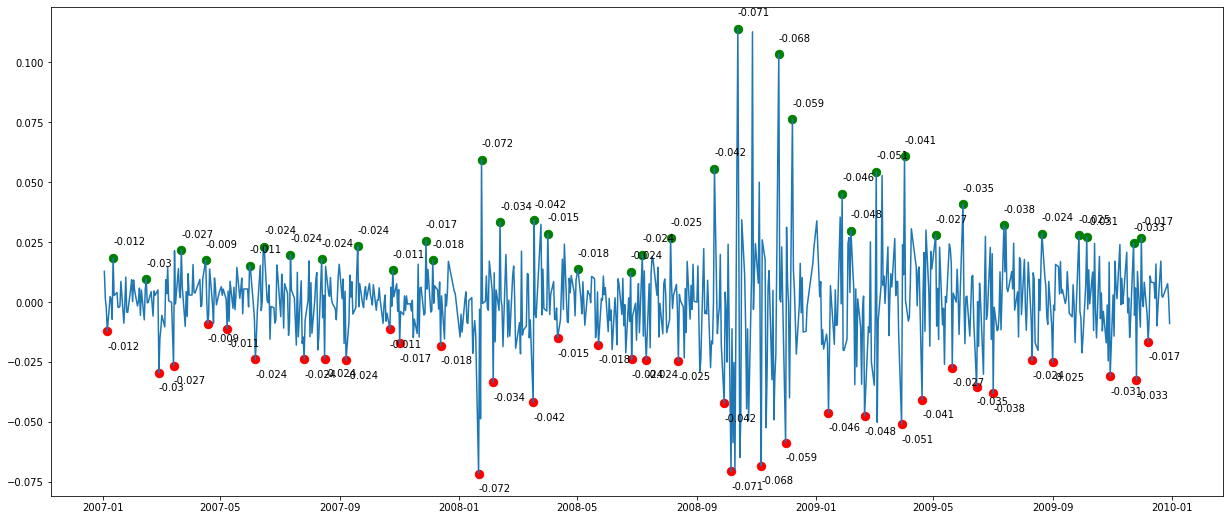

Finally, one last easy task! Change the color of the lineplot to black during the financial crisis, i.e. in year 2008.

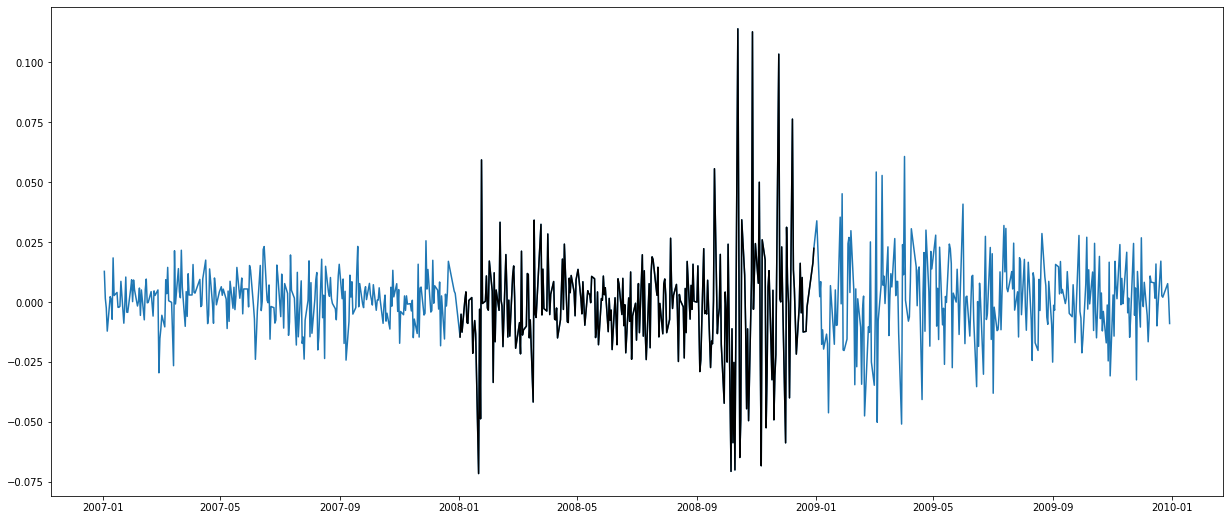

Helpful links:

#### Some helpful comments in stack overflow
https://stackoverflow.com/questions/30121773/python-is-it-possible-to-change-line-color-in-a-plot-if-exceeds-a-specific-rang

#### Collection of nice plots
https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

#### Python plots for practical business
https://pbpython.com/